# PREPROCESAMIENTO DE LOS DATOS

1. SELECCION DE CARACTERISTICAS
2. GESTIÓN DE TIPOS
3. GESTIÓN DE VARIABLES CATEGÓRICAS
4. MISSING VALUES
5. OUTLIERS
6. NORMALIZACION/ESTANDARIZACIÓN
7. EXPORTAR DATOS PROCESADOS

In [51]:
import os
import shutil
import zipfile
import pandas as pd
import seaborn as sns
import pca 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

## SELECCION DE LAS CARACTERISTICAS

In [52]:
df=pd.read_csv('../data/creditcard.csv')

In [53]:
train, test = train_test_split(df, test_size=0.2, stratify=df["Class"],random_state=42)

Debido a que nuestro dataset no tiene informacion y hemos visto con las correlaciones que no existen mucha correlacion entre variables podemos quedarnos con todas las variables del dataset orioginal ya que todas explican una parte del dataset, pero reduciremos su dimensionalidad para favorecer al modelo.

## GESTIÓN DE TIPOS

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227845 entries, 265518 to 17677
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     227

In [55]:
train['Class']=train['Class'].astype('object')

## GESTIÓN DE VARIABLES CATEGÓRICAS: 

Debido a que en nuestra base de datos no existen variables categóricas, únicamente nuestra variable objetivo que transformamos nosotros, vamos a prescindir de este paso de gestión de variables categóricas. 

## MISSING VALUES:

Tras comprobar en el EDA que no existen valores faltantes, no será necesario transformar o gestionar los mismos puesto que son inexistentes. 

## OUTLIERS: 

Los outliers han sido fijados en un rango por debajo calculado como media - 2*std, y un rango por encima calculado como media + 2*std, esto se hace así por regla general, porque las distribuciones son mayoritariamente normales por lo que las colas a dos veces la desviación típica se entienden como outliers. 
Dicho porcentaje de valores atípicos tanto por debajo como por encima de lo establecido anteriormente, va a ser imputado con la mediana. Esta imputacion se debe hacer por el test ya que estos valores los tomamos como que son valores reales y deben simular ser valores nuevos 

In [56]:
num_cols=train.select_dtypes(exclude='object')
num_cols

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,147710.0,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,...,-0.174051,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99
85418,60764.0,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,...,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99
29062,35301.0,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,...,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42
13766,24413.0,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,...,-0.093783,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,0.89


In [57]:
for col in num_cols:
        media = train[col].mean()
        std = train[col].std()
        mediana = train[col].median()

        limite_inferior = media - 2 * std
        limite_superior = media + 2 * std

        # Reemplaza los valores fuera del rango por la mediana
        train[col] = train[col].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)
        test[col] = test[col].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)


## NORMALIZACIÓN:

In [58]:
X_train = train.drop('Class', axis=1)  
y_train = train['Class']
X_test =  test.drop('Class', axis=1)  
y_test = test['Class']   
           


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustamos solo con X_train
X_train_scaled = scaler.fit_transform(X_train)

# Aplicamos a X_test
X_test_scaled = scaler.transform(X_test)

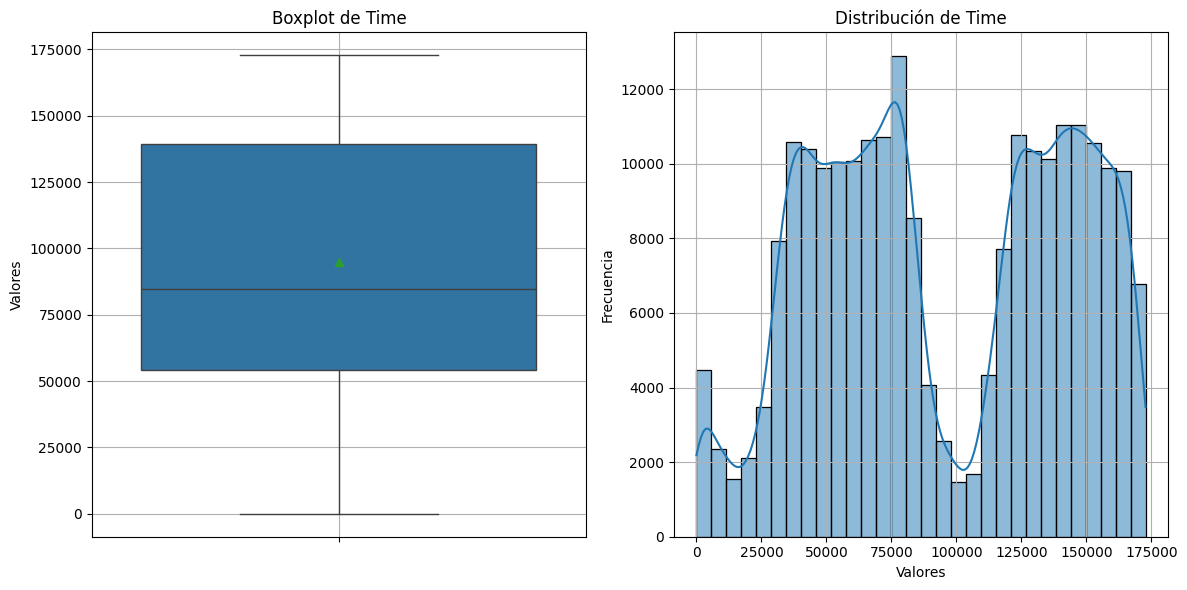

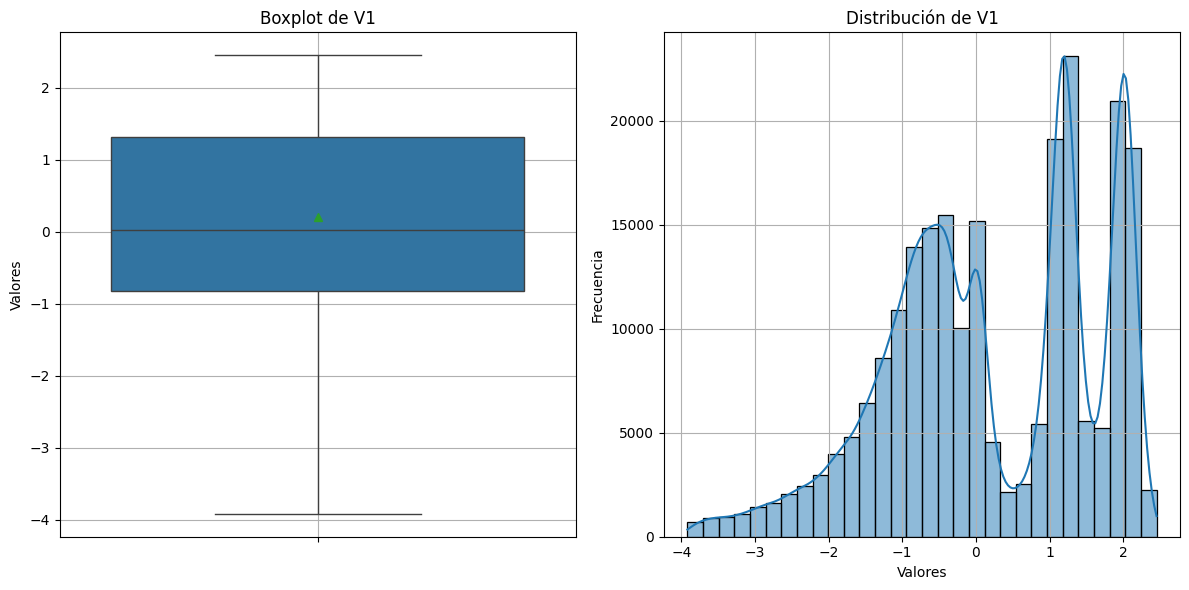

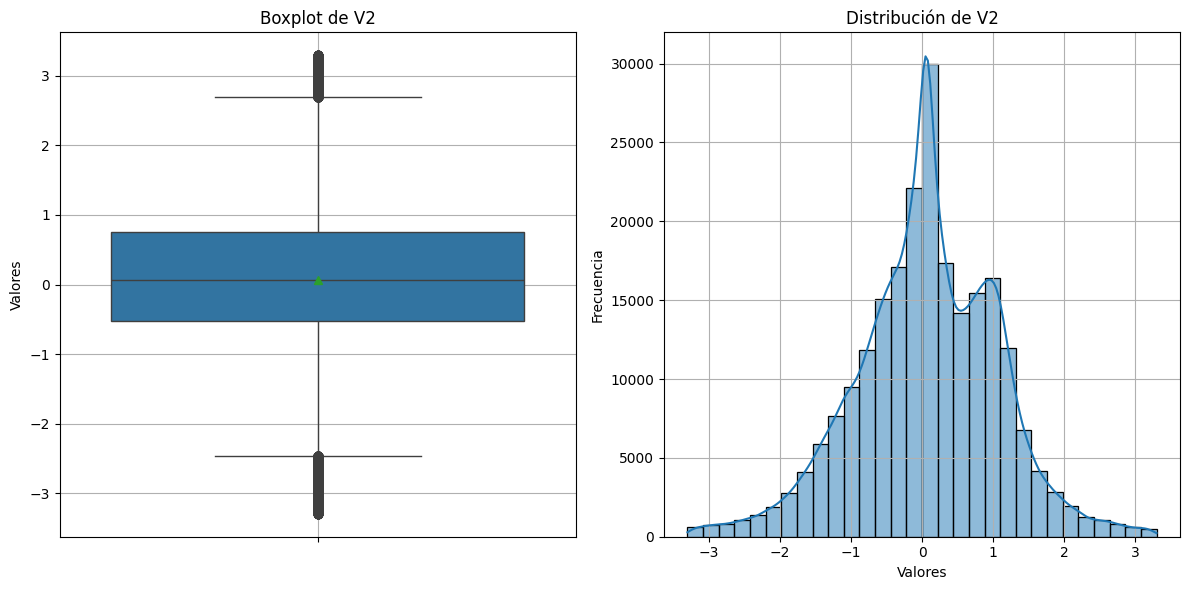

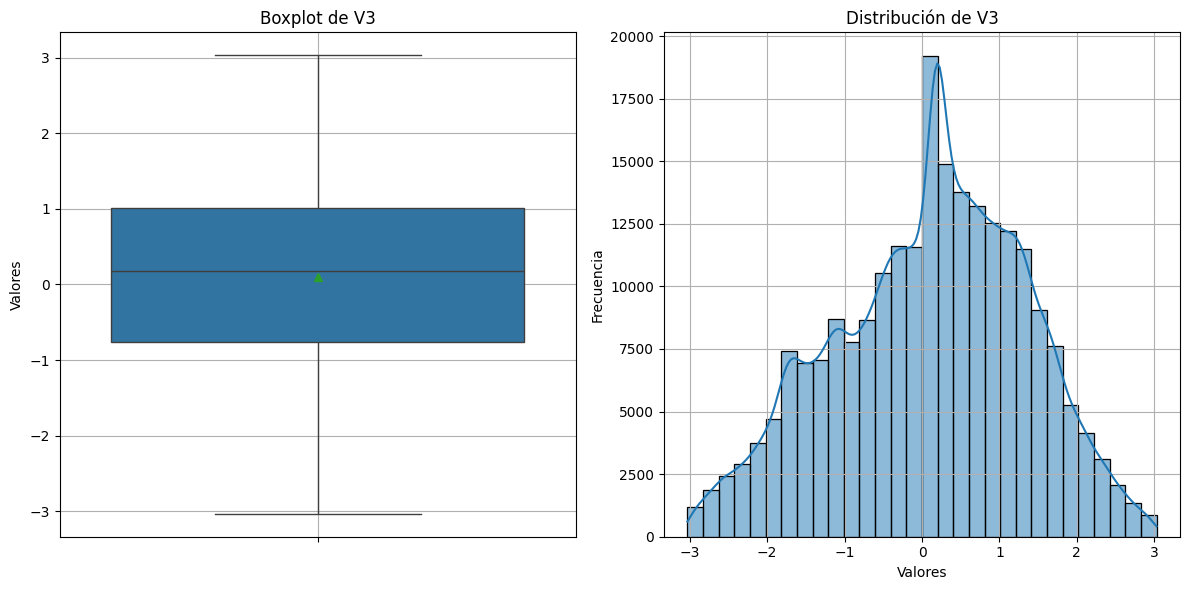

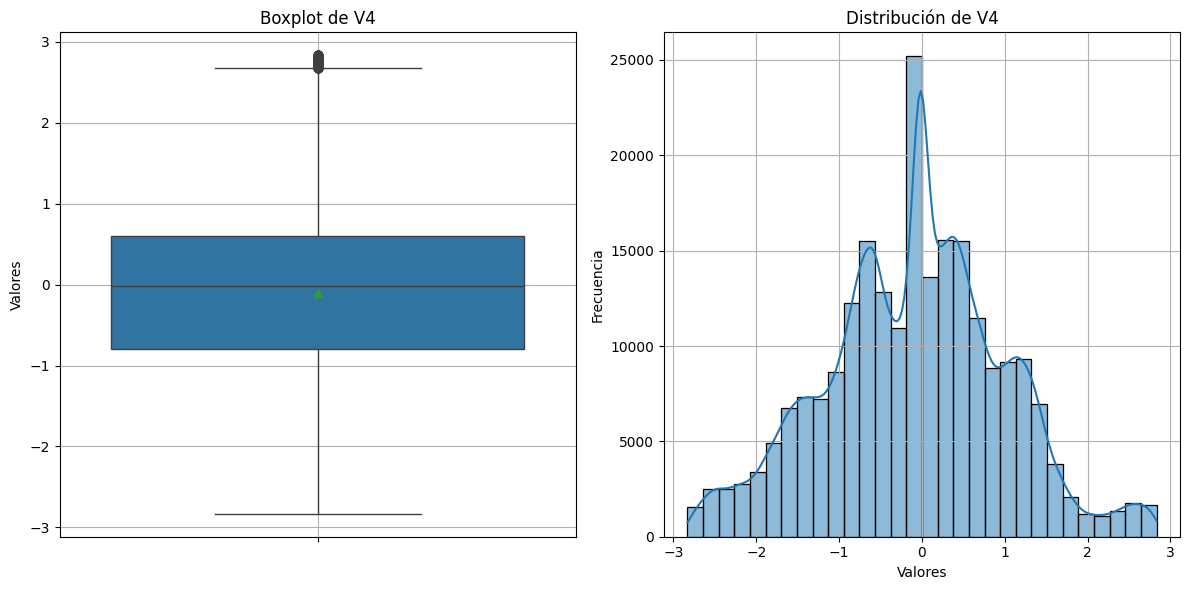

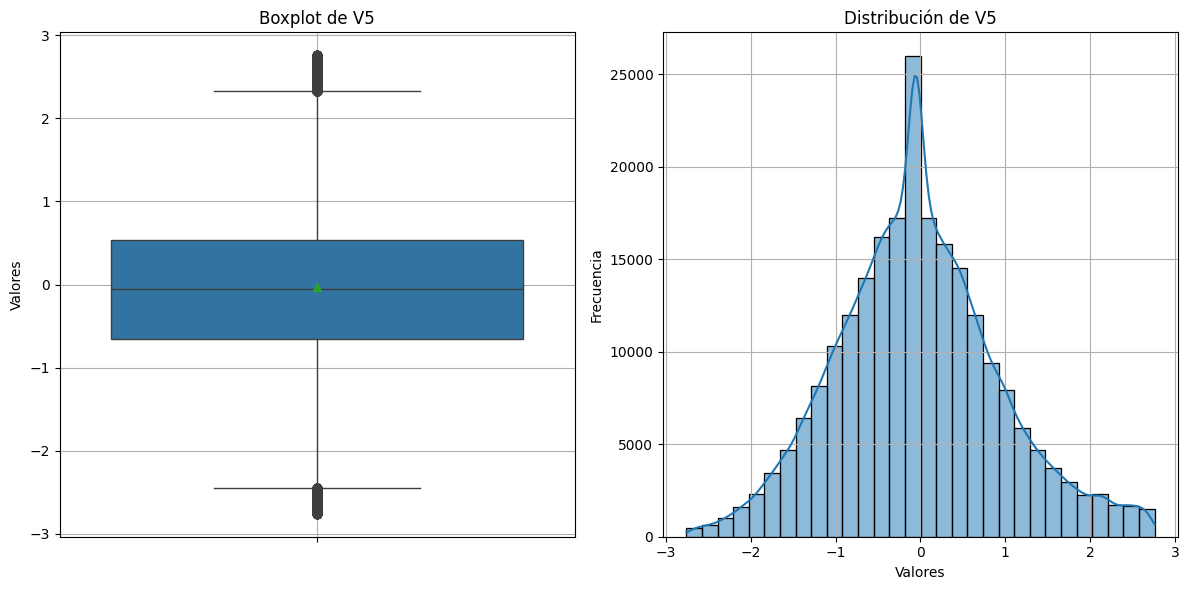

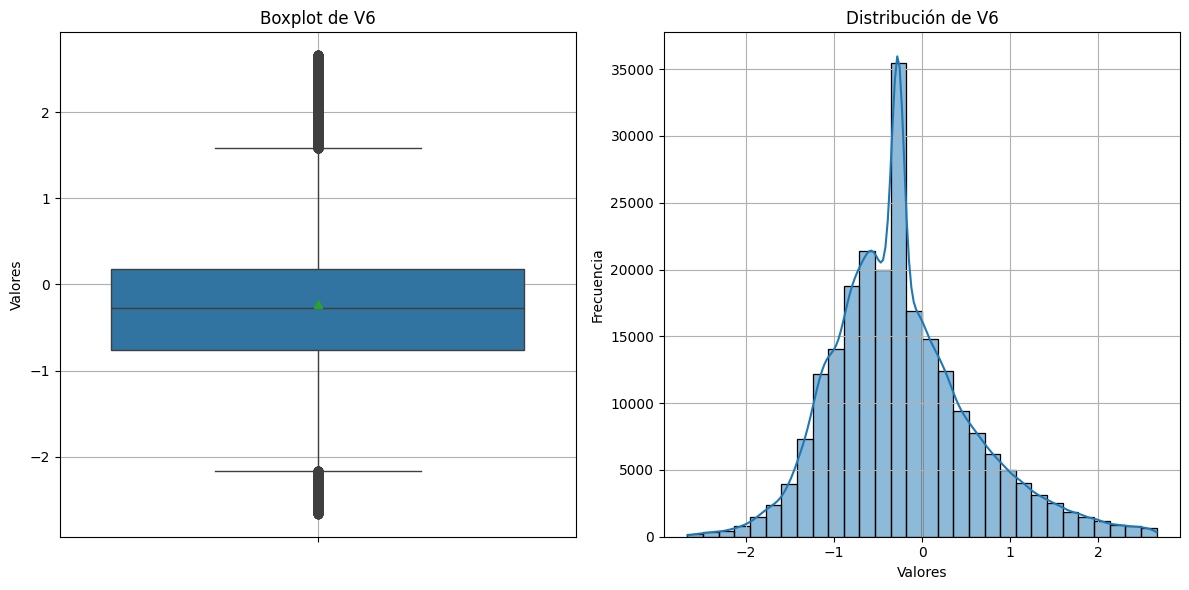

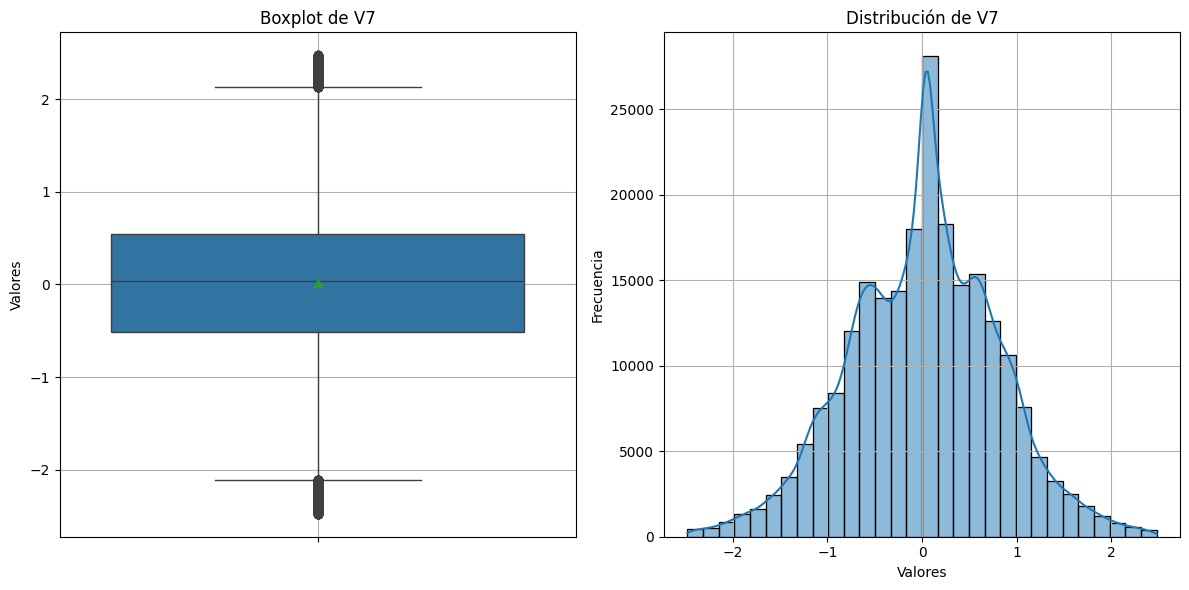

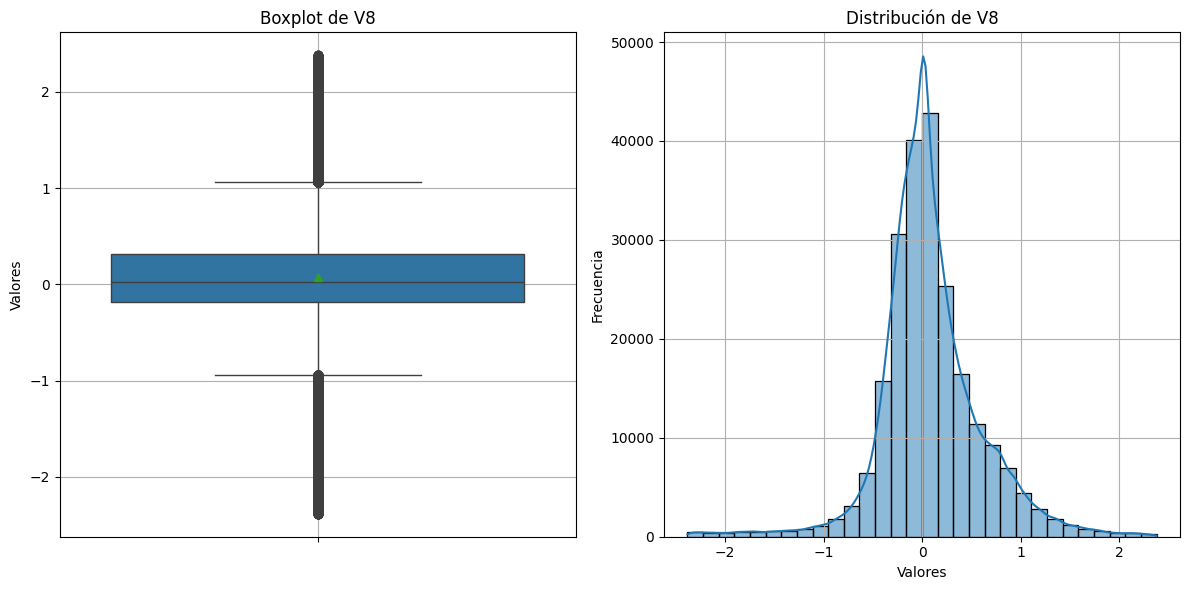

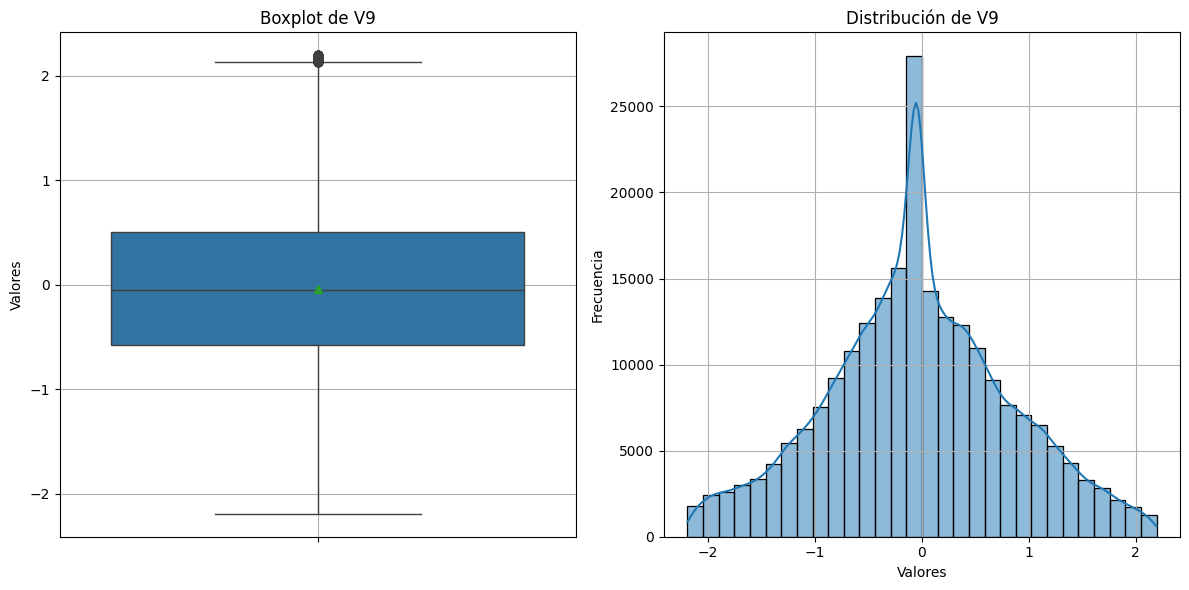

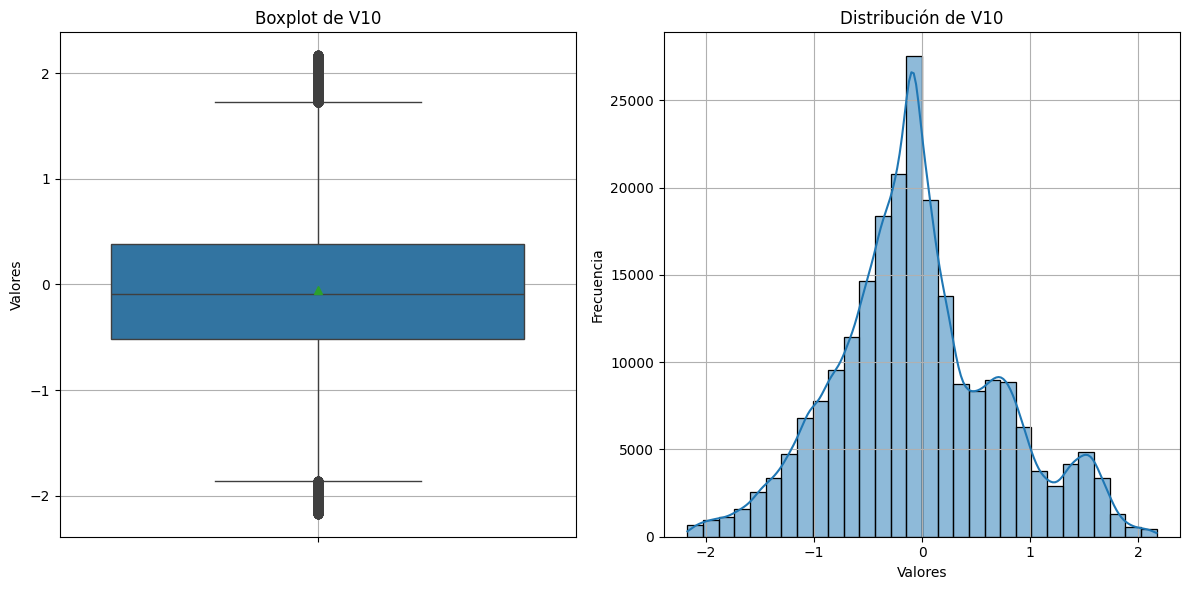

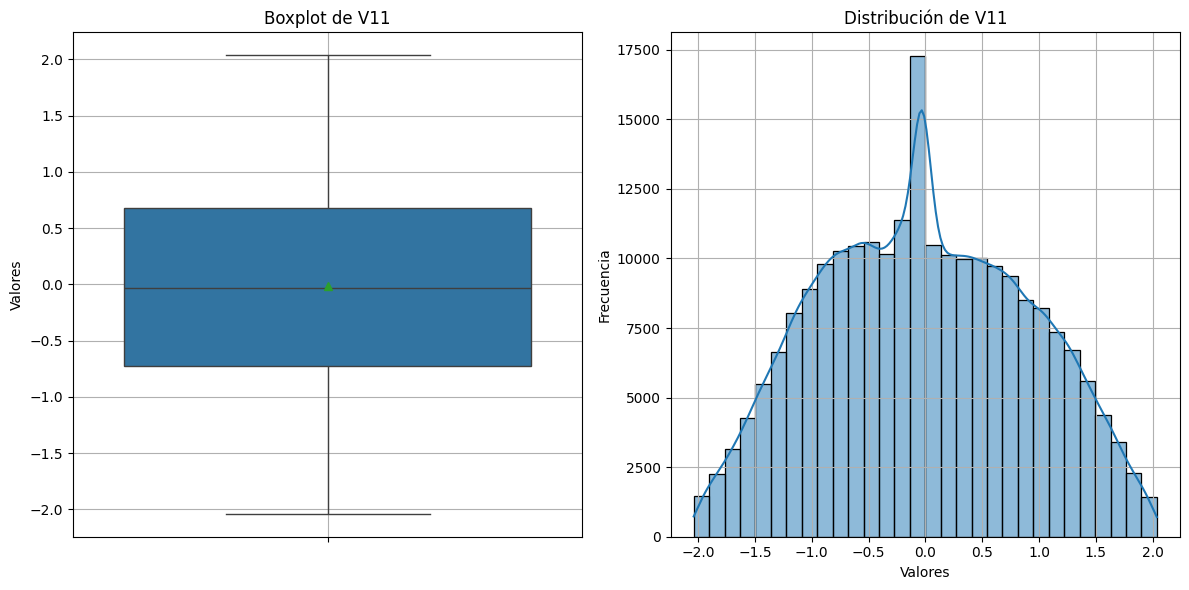

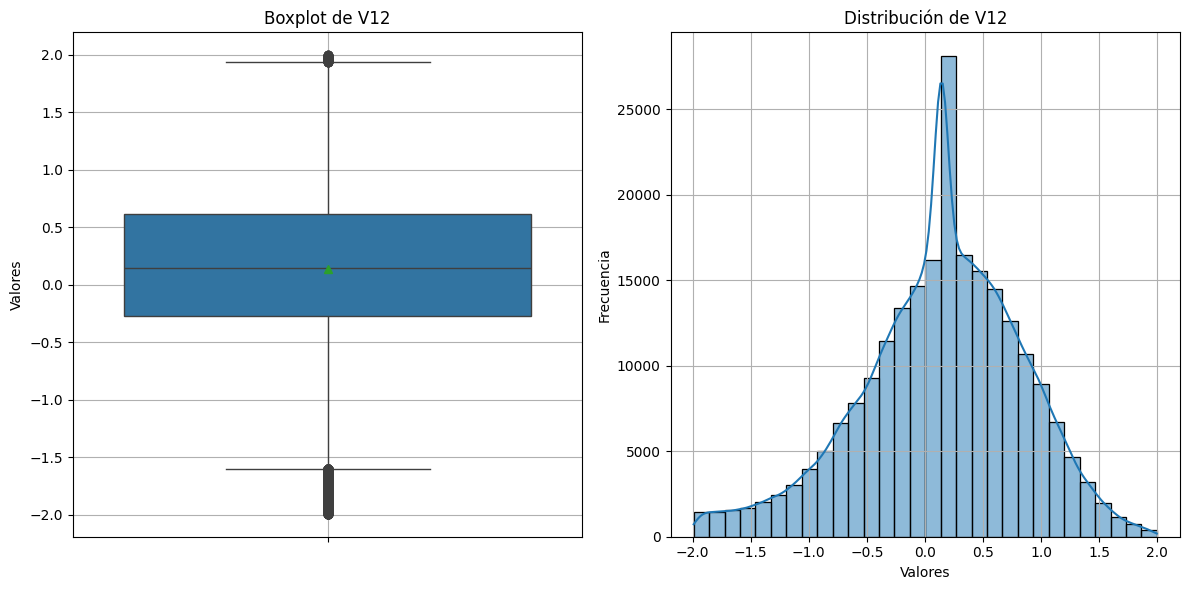

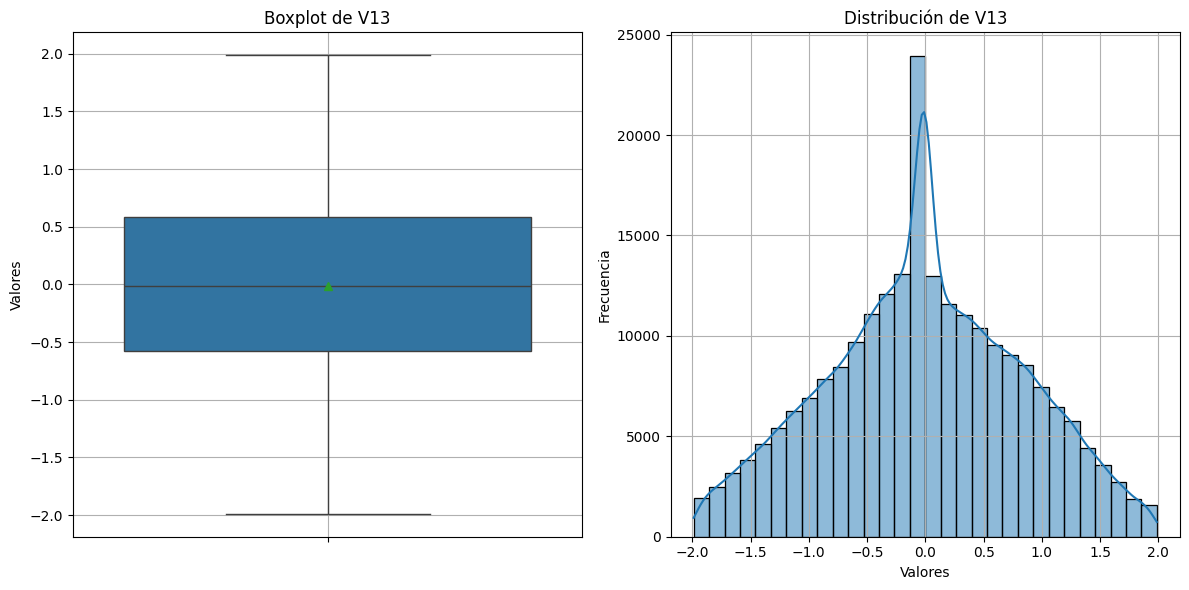

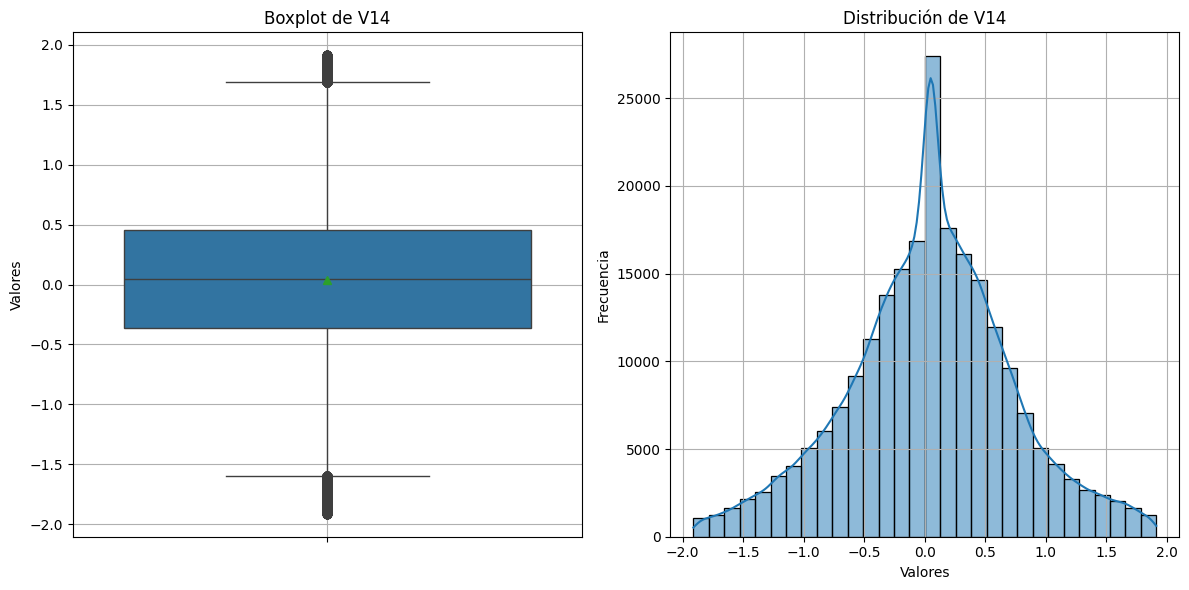

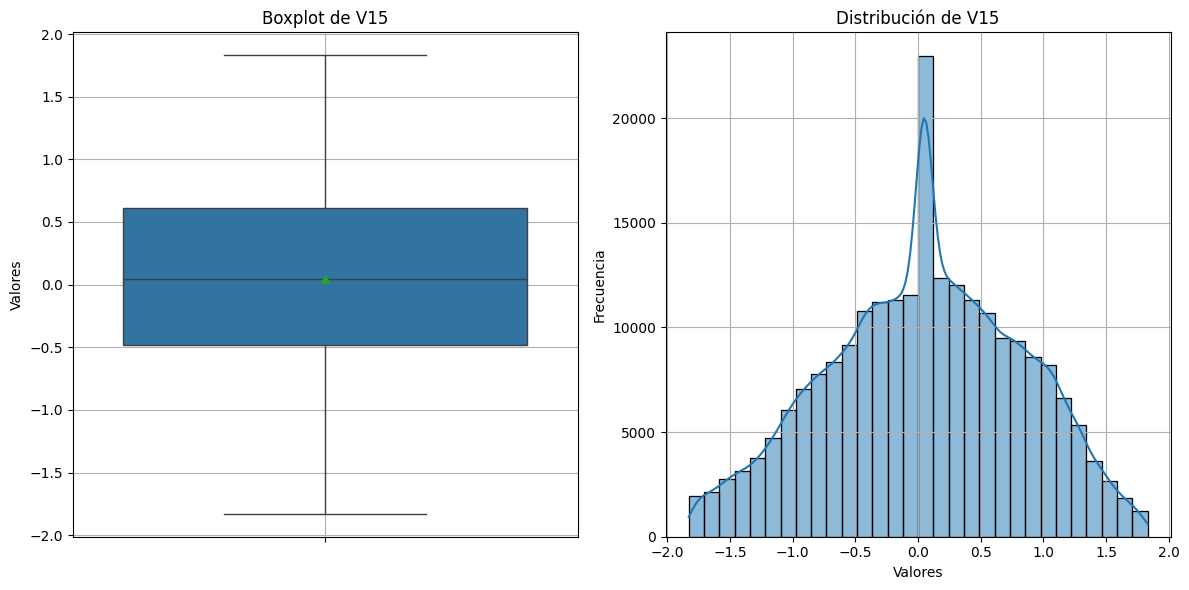

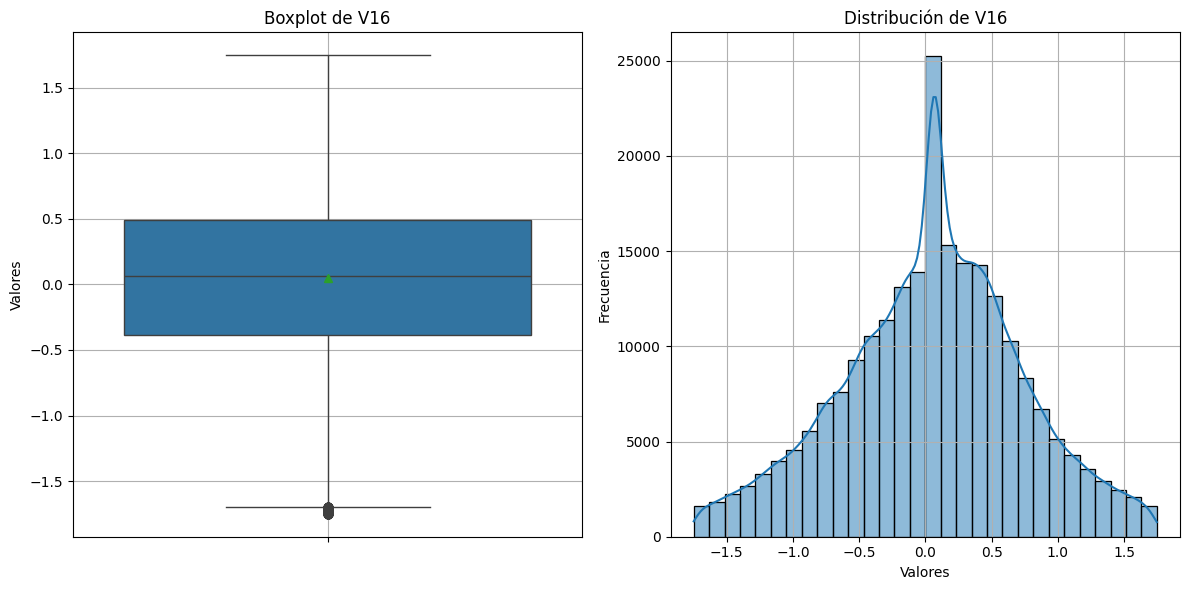

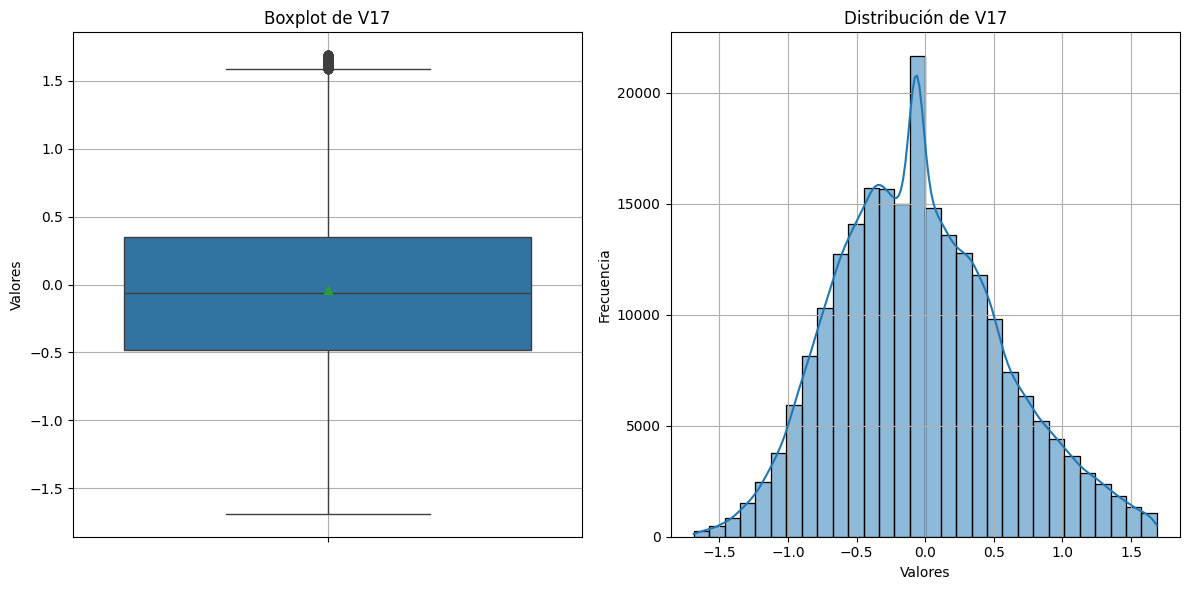

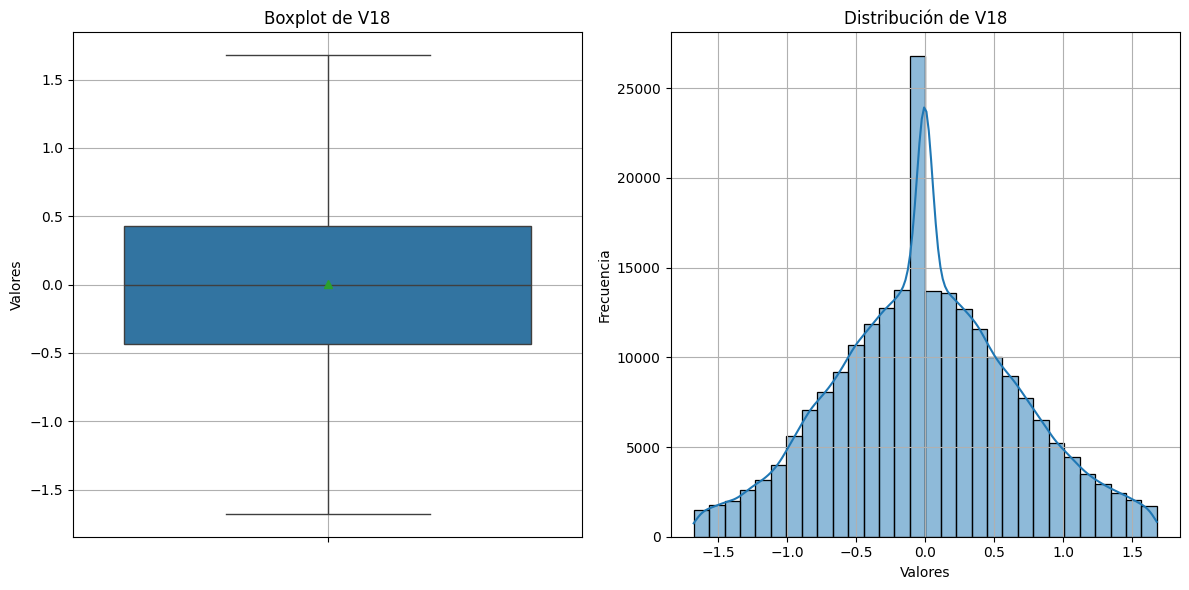

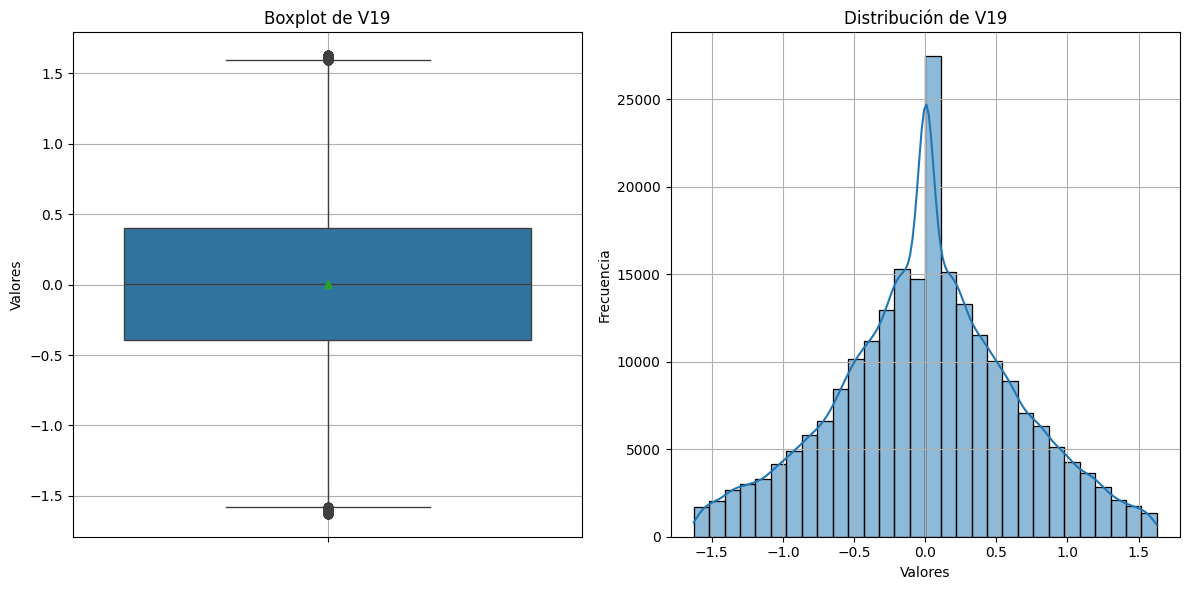

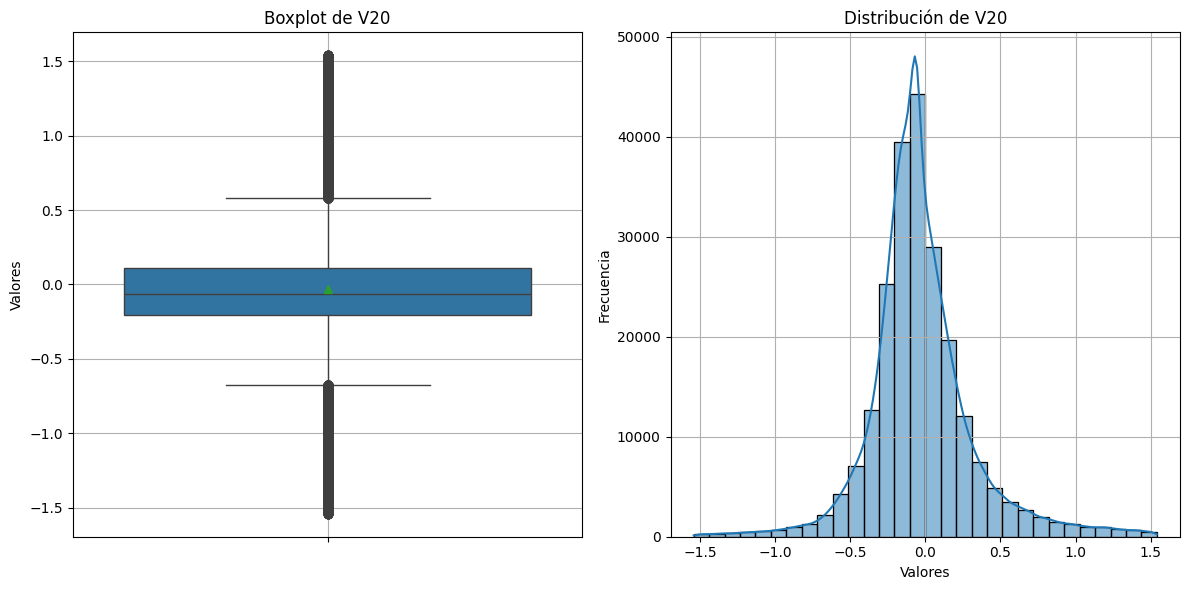

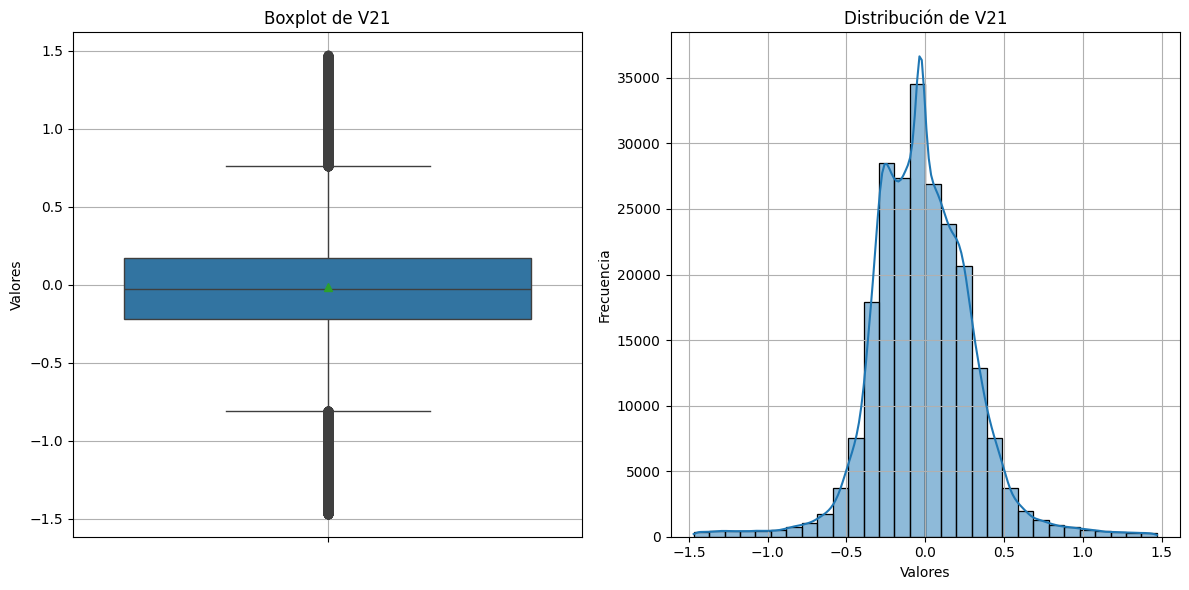

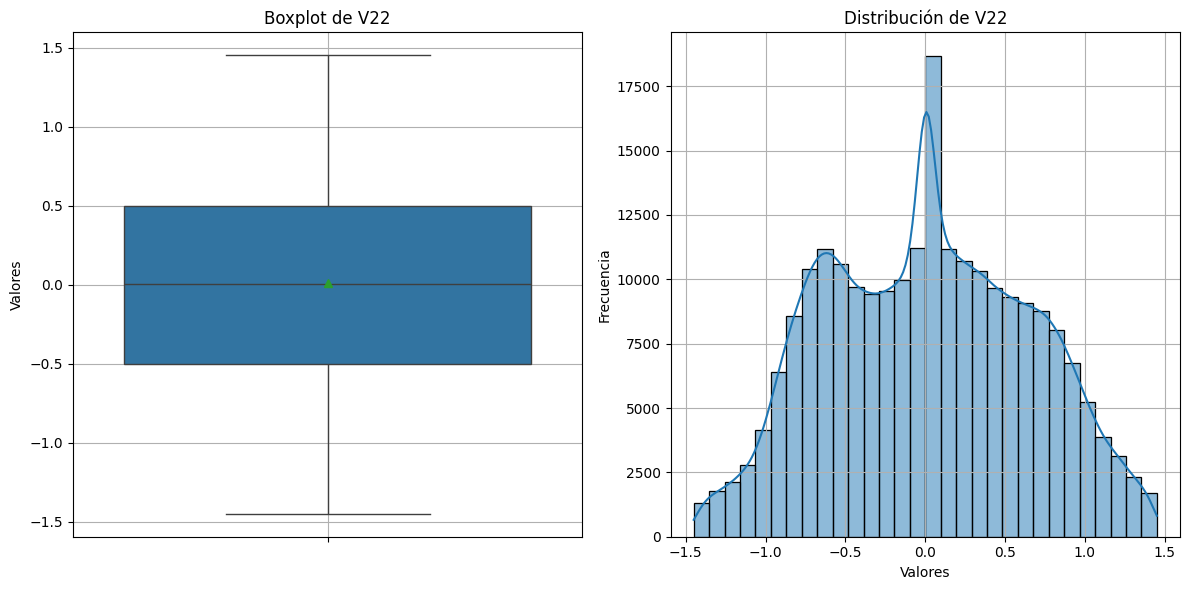

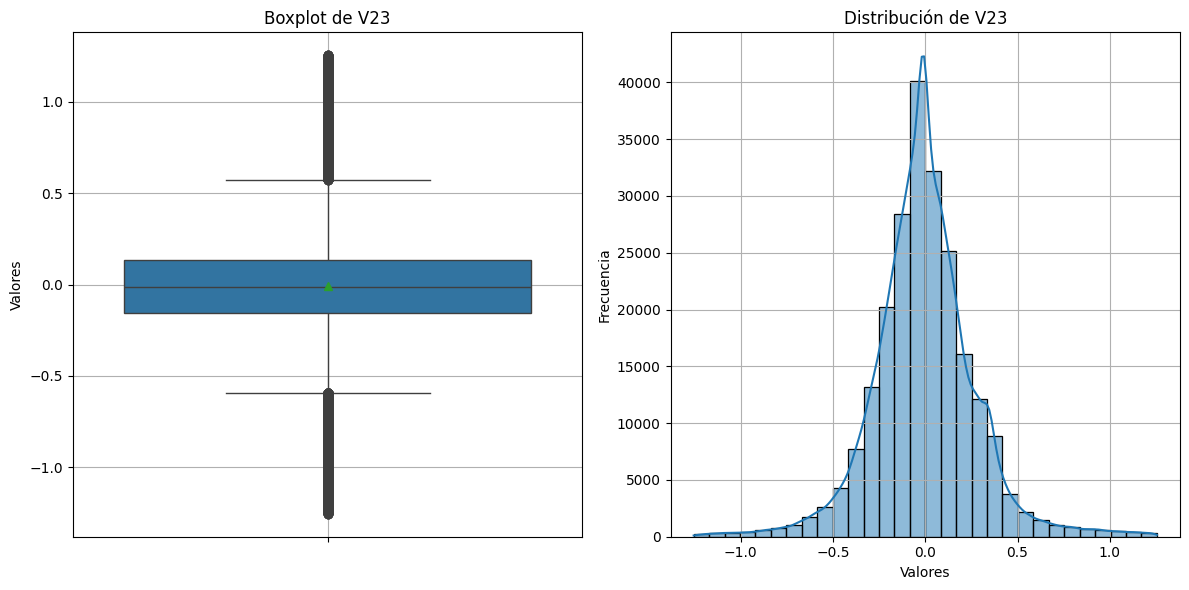

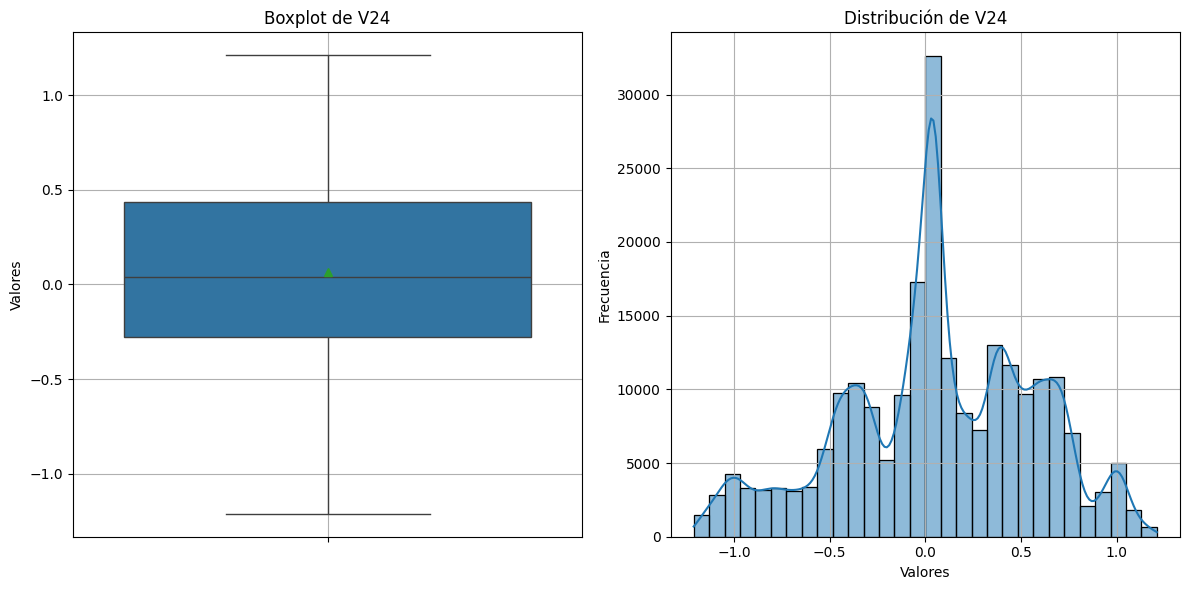

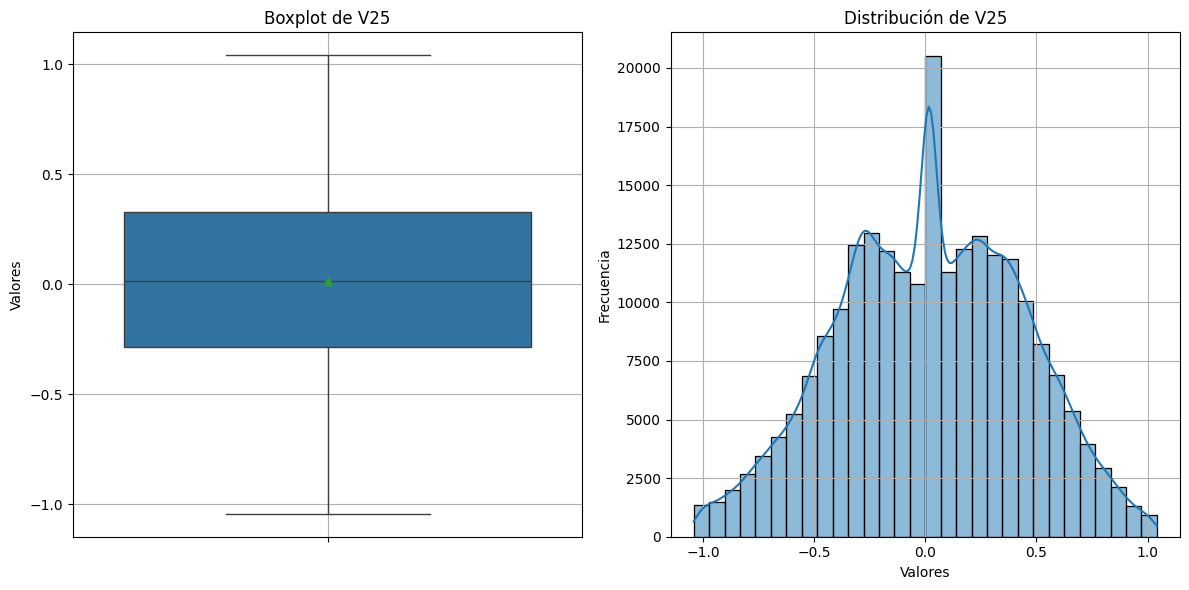

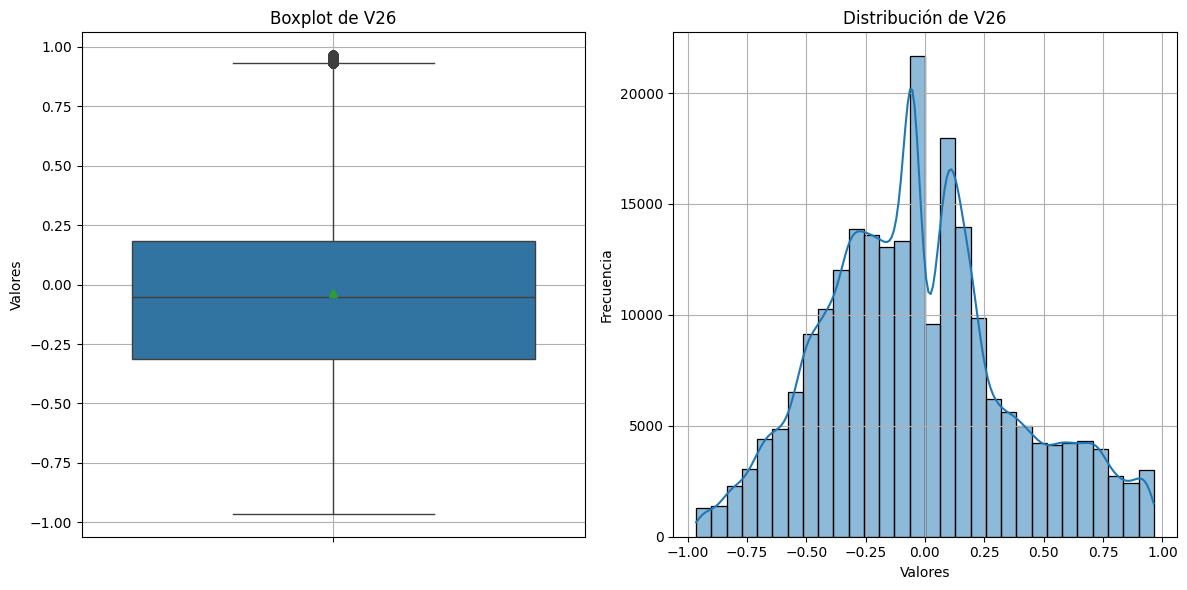

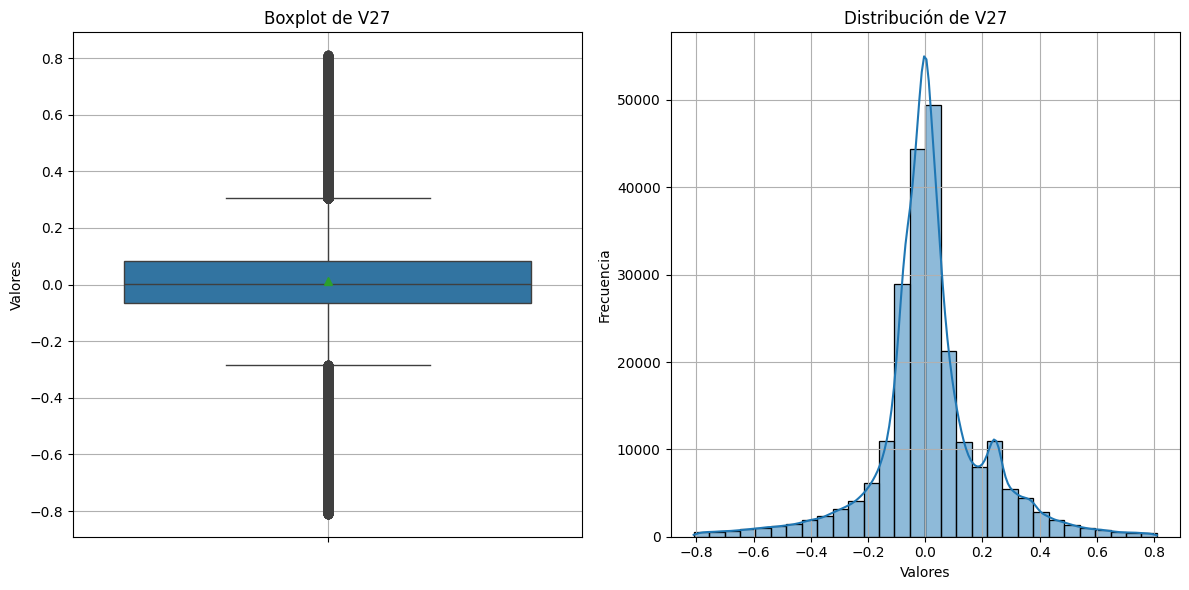

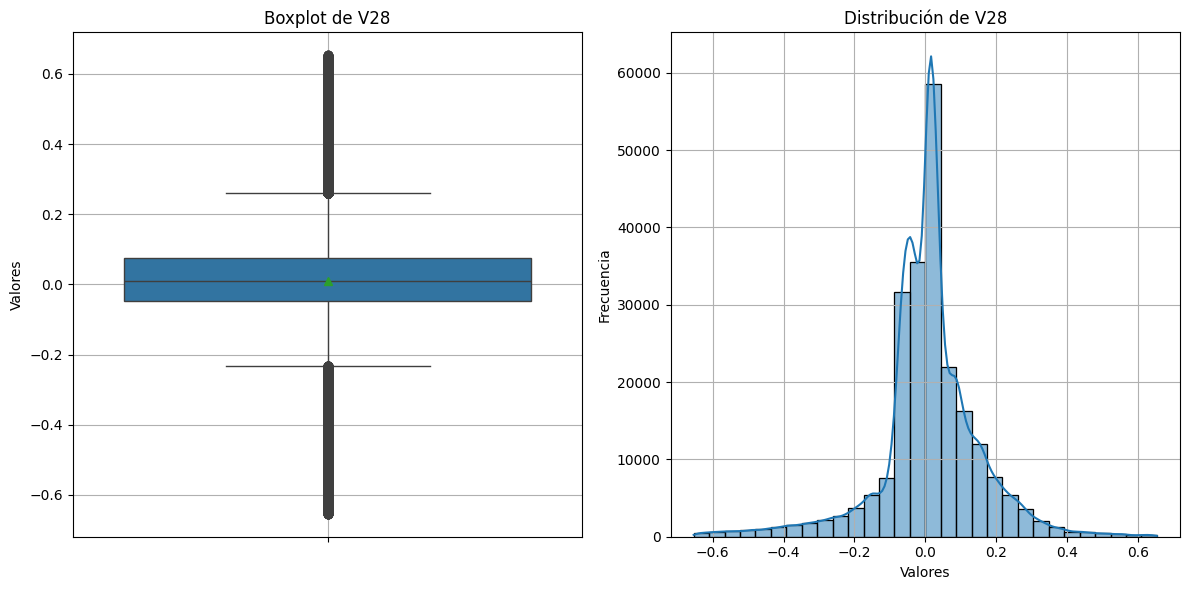

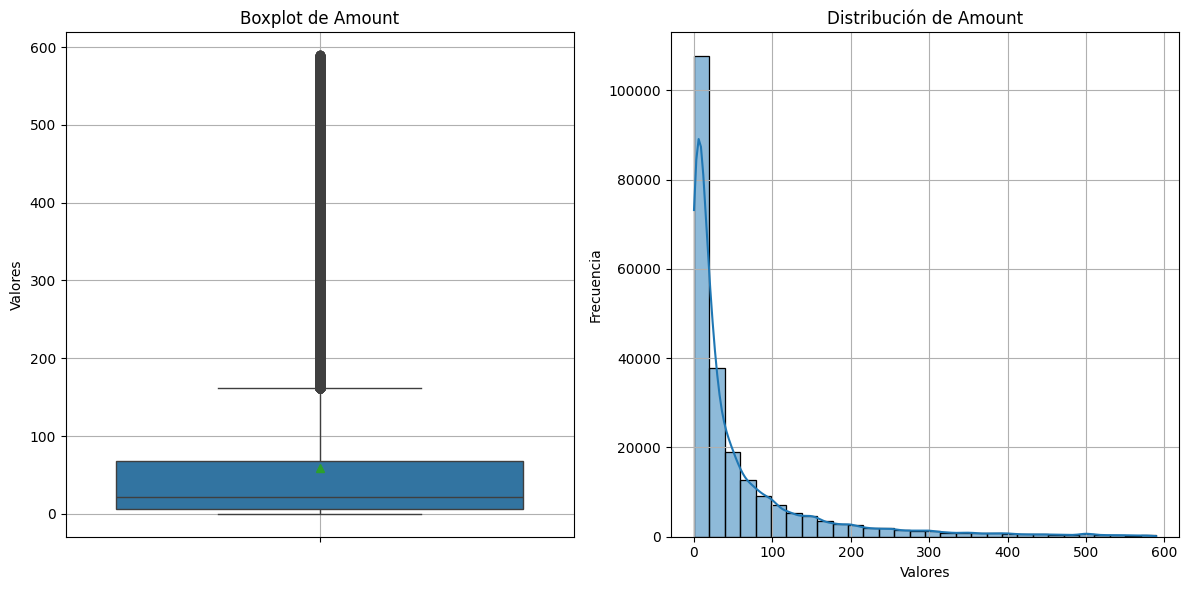

In [60]:
def print_variables(df, cols):
    for col in cols:
        plt.figure(figsize=(12, 6))
        
        # Subgráfico para el boxplot
        plt.subplot(1, 2, 1) 
        sns.boxplot(y=df[col], showmeans=True)
        plt.title(f'Boxplot de {col}')
        plt.ylabel('Valores')
        plt.grid(True)

        # Subgráfico para la distribución
        plt.subplot(1, 2, 2)  
        sns.histplot(df[col], kde=True, bins=30)  
        plt.title(f'Distribución de {col}')
        plt.xlabel('Valores')
        plt.ylabel('Frecuencia')
        plt.grid(True)

        plt.tight_layout()  
        plt.show()
    
print_variables(X_train,num_cols)

MODELOS QUE HAREMOS: 
- REGRESION LOGISTICA POR SU SIMPLICIDAD 
- ARBOL DECISION 
- RANDOM FOREST 
- XGBoost
- LightGBM

## EXPORTAR DATOS PROCESADOS

In [64]:
import os

# Ruta donde quieres guardar los archivos
output_path = '../data_processed/clean/'

# Crear la carpeta si no existe
os.makedirs(output_path, exist_ok=True)

# Combinar X e y para train y test
train_df = X_train.copy()
train_df['Class'] = y_train

test_df = X_test.copy()
test_df['Class'] = y_test

# Guardar los CSVs en la ruta deseada
train_df.to_csv(os.path.join(output_path, 'train_data.csv'), index=False)
test_df.to_csv(os.path.join(output_path, 'test_data.csv'), index=False)



Despues de hacer la normalizacion, venmos que la variable time no sigue una distribucion normal, en SUGERENCIAS deberemos incluir que sería apropiado convertir la variable en categórica, lo que popdría mejorar notablemente el rendimiento del modelo. 